<h6> the dataset is for 10128 unique customers <h6>

In [2]:
import os
import zipfile
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#inspect contents of zipfile
with zipfile.ZipFile('Credit-Score-Data.zip', 'r') as zip_ref:
    print(zip_ref.namelist())


['Credit Score Data/', 'Credit Score Data/.DS_Store', '__MACOSX/Credit Score Data/._.DS_Store', 'Credit Score Data/train.csv', '__MACOSX/Credit Score Data/._train.csv']


In [4]:

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)  # Show all columns
#read in csv file
csv_file= 'Credit Score Data/train.csv'
zip_path = 'Credit-Score-Data.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(csv_file) as file:
        df = pd.read_csv(file)
print(df.shape)
df.head(3)


(100000, 28)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

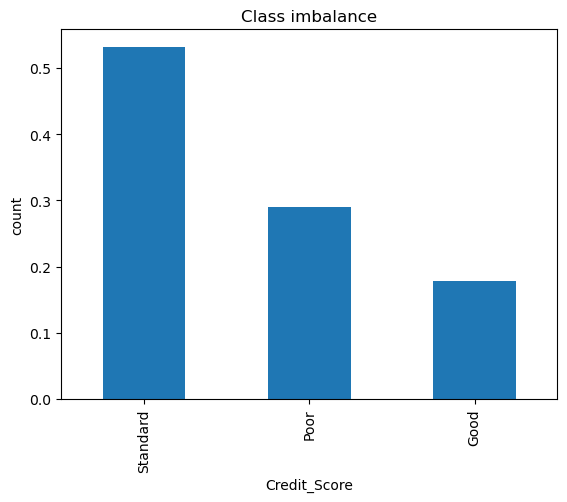

In [6]:
#check for class imbalance
df['Credit_Score'].value_counts(normalize = True).plot(kind ='bar',
                                                       ylabel ='count',
                                                      title ='Class imbalance');

In [7]:
df.describe(exclude ='object')

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


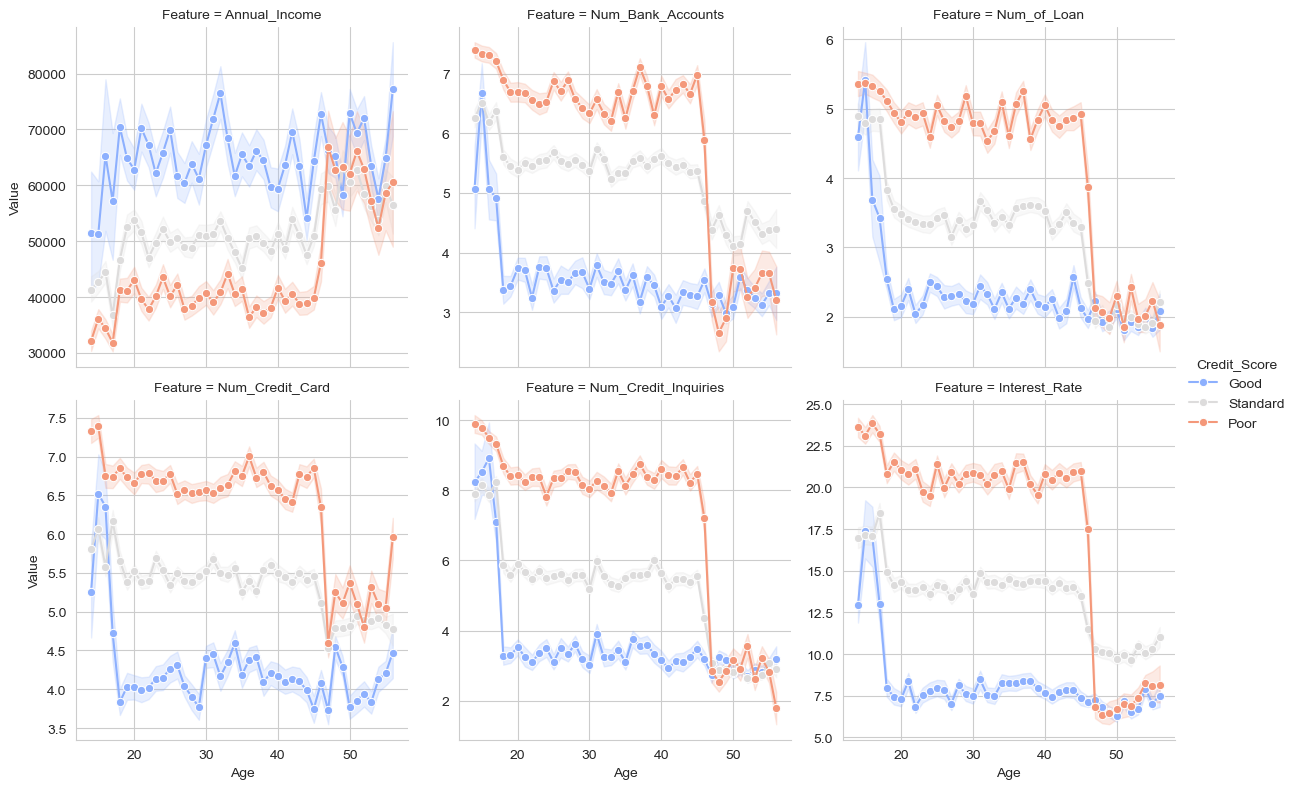

In [8]:
import warnings
# Suppress the specific warning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Melt the DataFrame to long format
long_df = df.melt(id_vars=['Age', 'Credit_Score'], 
                     value_vars=['Annual_Income', 'Num_Bank_Accounts', 'Num_of_Loan', 
                                 'Num_Credit_Card', 'Num_Credit_Inquiries','Interest_Rate'],
                     var_name='Feature', value_name='Value')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a FacetGrid with multiple line plots
g = sns.FacetGrid(long_df, col="Feature", hue="Credit_Score", palette="coolwarm", col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, "Age", "Value", marker="o")

# Adjust layout
g.add_legend()
plt.show()


<h6> as expected we see a high annual income results into a good credit score and older customers are earning more
 younger people tend to have more bank accounts than older ones,younger people make more inquiries as well as those with a poor credit score
keeping more than 4 accounts is not good for your credit score, have less than 5 credit cards, 
7.5% interest rate seems to be good for your credit score, maintain less than 3 loans at a time
<h6>

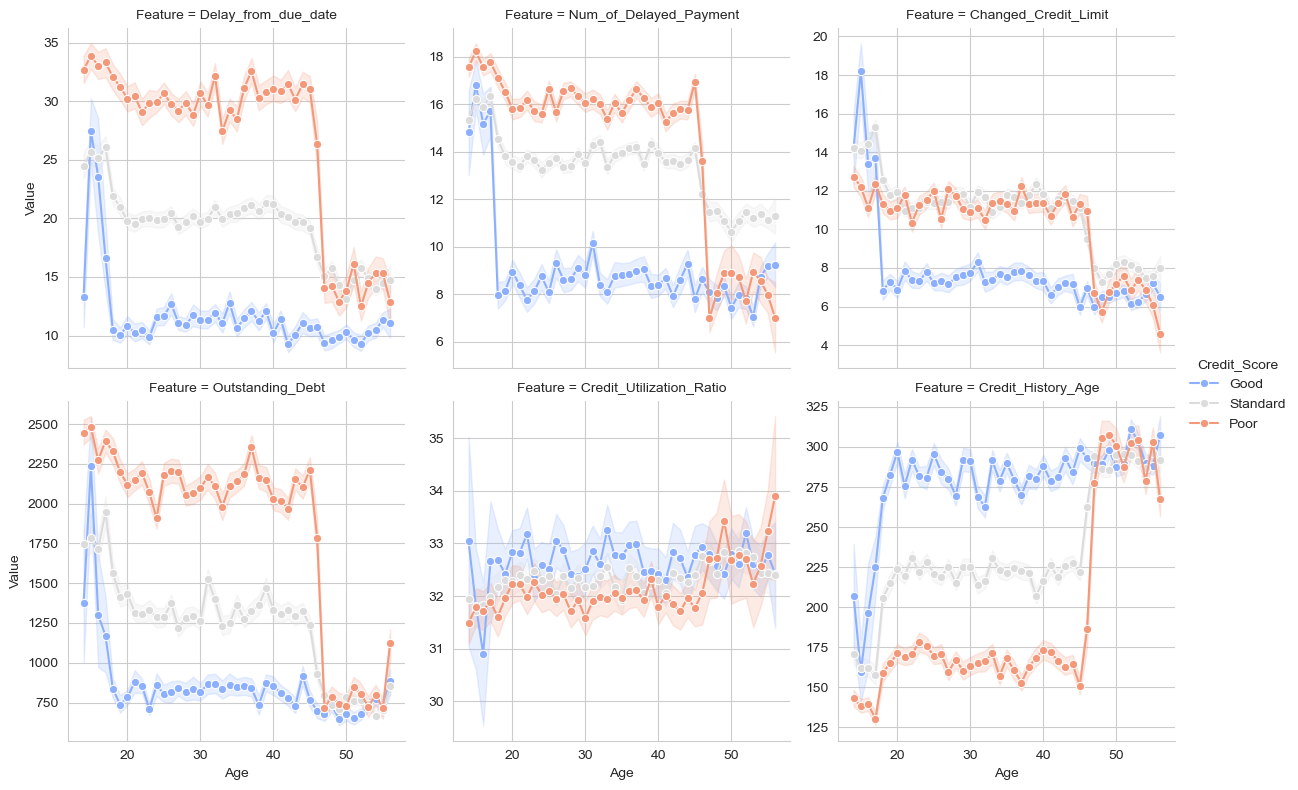

In [10]:
import warnings
# Suppress the specific warning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Melt the DataFrame to long format
long_df = df.melt(id_vars=['Age', 'Credit_Score'], 
                     value_vars=['Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit',	'Outstanding_Debt',
                                 'Credit_Utilization_Ratio','Credit_History_Age'],
                     var_name='Feature', value_name='Value')

# Set Seaborn style
sns.set_style("whitegrid")

# Create a FacetGrid with multiple line plots
g = sns.FacetGrid(long_df, col="Feature", hue="Credit_Score", palette="coolwarm", col_wrap=3, height=4, sharey=False)
g.map(sns.lineplot, "Age", "Value", marker="o")

# Adjust layout
g.add_legend()
plt.show()


<h6>delaying payment less than 14 days is good for your score,below 10 delayed paymenst is good for your score,
outsanding debt of below 1000,as expected older people have a big credit_history_age and big credit_history_age results in a good score,
according to this data credit_utilization has less effect on your score<h6>

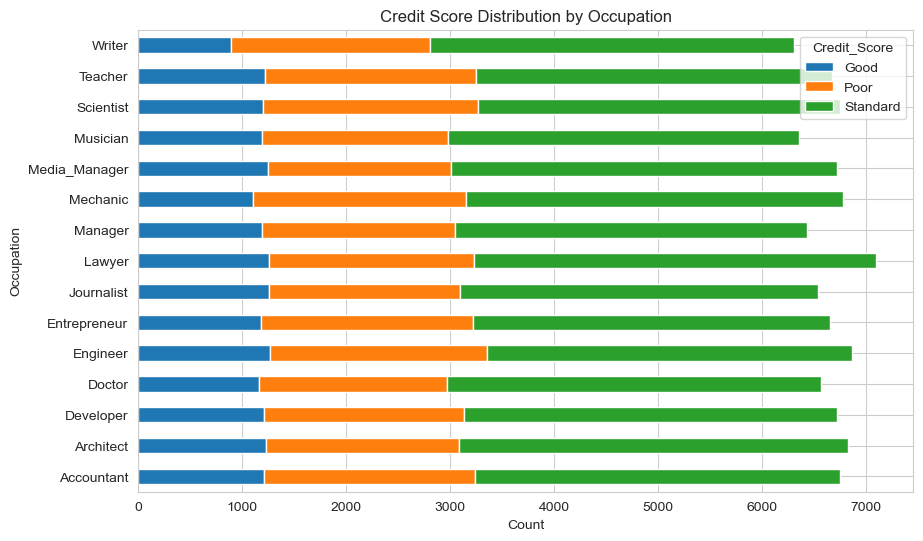

In [12]:
#credit score distribution by occupation
# Pivoting the data
pivot_table = pd.pivot_table(df, 
                             index='Occupation', 
                             columns='Credit_Score', 
                             aggfunc='size',  
                             fill_value=0) 

# Display the result
pivot_table.plot(kind ='barh',stacked=True, figsize=(10, 6))
plt.title('Credit Score Distribution by Occupation')
plt.ylabel('Occupation')
plt.xlabel('Count');

<h5>model building<h5>

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline,Pipeline

In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [16]:
from sklearn.compose import ColumnTransformer

In [17]:
#skewness
df.select_dtypes(include = 'float64',).drop(columns ='SSN').skew()

Age                         0.156338
Annual_Income               1.130223
Monthly_Inhand_Salary       1.128690
Num_Bank_Accounts          -0.190015
Num_Credit_Card             0.225808
Interest_Rate               0.496232
Num_of_Loan                 0.445609
Delay_from_due_date         0.969840
Num_of_Delayed_Payment     -0.214470
Changed_Credit_Limit        0.708342
Num_Credit_Inquiries        0.406825
Outstanding_Debt            1.207536
Credit_Utilization_Ratio    0.028617
Credit_History_Age         -0.048832
Total_EMI_per_month         4.041492
Amount_invested_monthly     1.761036
Monthly_Balance             1.355614
dtype: float64

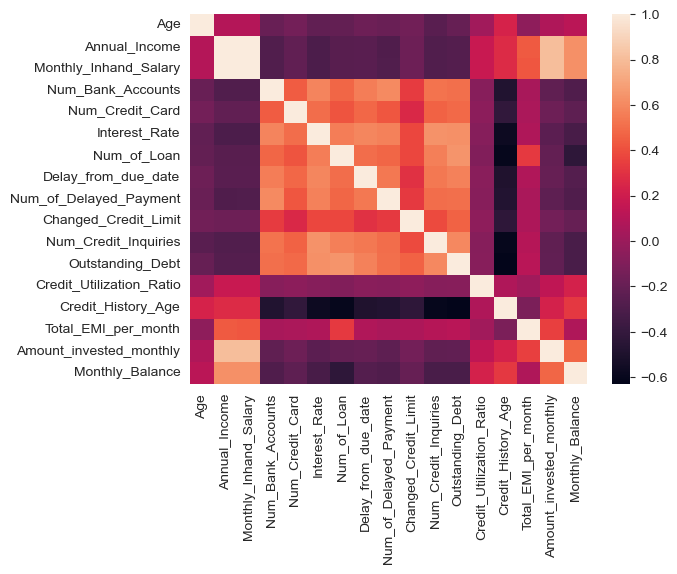

In [18]:
#correlation matrix
num_cols =df.select_dtypes(include = 'float64',).drop(columns ='SSN')
sns.heatmap(num_cols.corr());

<h5>So we see that our  data is imbalanced, most features are positively skewed,and we have autocorrelation issues,
which means that we should steer clear of linear models, and try a tree-based model instead.<h5>

In [20]:
#spliting the data
target = 'Credit_Score'
y = df[target]
X = df.drop(columns = ['ID','Customer_ID','Name','SSN','Credit_Score'])
#print(y.shape,X.shape)
#split data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42) 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(80000, 23) (20000, 23) (80000,) (20000,)


In [21]:
#keeping less frequent categories as other
#chose 60 as a threhold because below 60 contained more than 3 loans taken
threshold = 60# Example: Keep categories appearing at least 5 times
top_categories = X_train['Type_of_Loan'].value_counts()[X_train['Type_of_Loan'].value_counts() >= threshold].index
X_train['Type_of_Loan'] = X_train['Type_of_Loan'].apply(lambda x: x if x in top_categories else 'multiple_loans')
#X_train['Type_of_Loan'].value_counts()

#using frequency encoding 
X_train['loan_type_encoded'] = X_train['Type_of_Loan'].map(X_train['Type_of_Loan'].value_counts())
#X_train['loan_type_encoded'].nunique()
#drop the type of loan column
X_train.drop(columns ='Type_of_Loan', inplace = True)

In [22]:
#resampling
#undersampling
under_sampler = RandomUnderSampler()
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)
print(X_train_under.shape)
#X_train_under.head()

(42903, 23)


In [23]:
#oversampling
over_sampler = RandomOverSampler()
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
#X_train_over.head()

(127725, 23)


In [24]:
#baseline model
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.5322


In [25]:
#fit decision tree for reular, undersampling,oversampling

cat_columns = X_train.select_dtypes('object').columns
# Set up the ColumnTransformer to encode categorical features
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), cat_columns)])  # Keep other columns (e.g., numerical) as they are

# Define the pipeline with preprocessing and the classifier
model_reg = Pipeline(steps=[('preprocessor', preprocessor),('classifier', DecisionTreeClassifier(random_state=42))])
# Fit on `X_train`, `y_train`
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = Pipeline(steps=[('preprocessor', preprocessor),('classifier', DecisionTreeClassifier(random_state=42))])
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = Pipeline(steps=[('preprocessor', preprocessor),('classifier', DecisionTreeClassifier(random_state=42))])
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [26]:
#handling the high cardinality column in Xtest
threshold = 60# Example: Keep categories appearing at least 5 times
top_categories = X_test['Type_of_Loan'].value_counts()[X_test['Type_of_Loan'].value_counts() >= threshold].index
X_test['Type_of_Loan'] = X_test['Type_of_Loan'].apply(lambda x: x if x in top_categories else 'multiple_loans')

#using frequency encoding 
X_test['loan_type_encoded'] = X_test['Type_of_Loan'].map(X_test['Type_of_Loan'].value_counts())

#drop the type of loan column
X_test.drop(columns ='Type_of_Loan', inplace = True)

#evaluate the three models
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)
    
    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))
    

Training Accuracy: 0.6268
Test Accuracy: 0.621
Training Accuracy: 0.6075
Test Accuracy: 0.6036
Training Accuracy: 0.6171
Test Accuracy: 0.6161


<h5> the model with out any sampling is performing better so we will be working with it for now<h5>

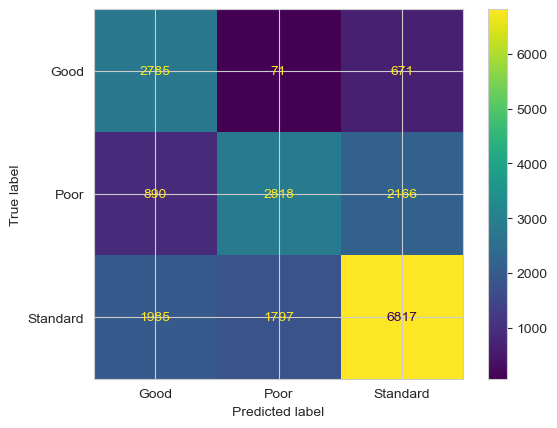

In [28]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test);

In [29]:
#get depth
depth = model_reg.named_steps['classifier'].get_depth()
print(depth)

23
